# Bland-Altman plot 그리기

상세 설명은 블로그 참고
https://heesunpark26.tistory.com/24

### Statsmodel 이용해서 그리기

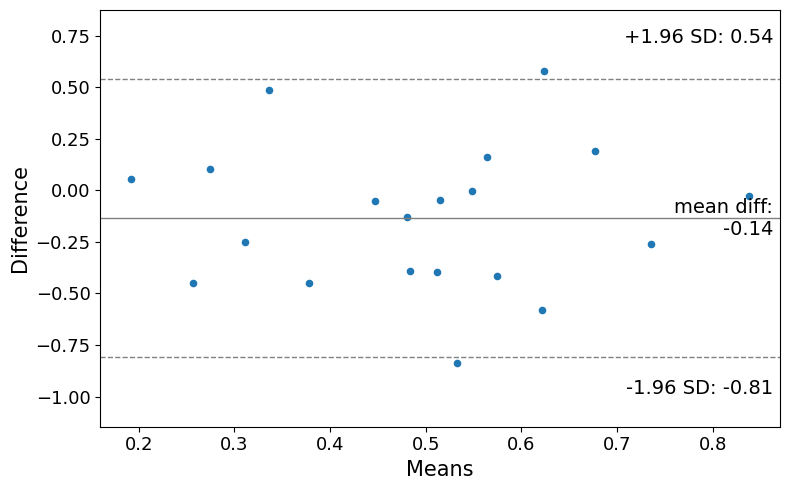

In [3]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
# 임의의 데이터 만들기
np.random.seed(9999)
m1 = np.random.random(20) # 첫번째 측정값
m2 = np.random.random(20) # 두번째 측정값
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(m1, m2, ax = ax)
plt.show()


### Confidence interval 포함해서 그리기

In [4]:
import numpy as np
import scipy.stats as stats
# source: https://www.statsmodels.org/dev/_modules/statsmodels/graphics/agreement.html#mean_diff_plot

def mean_diff_plot_ci(m1, m2, sd_limit=1.96, ax=None, fig=None, scatter_kwds=None,
                   mean_line_kwds=None, limit_lines_kwds=None):
    
    ## --- check inputs
    if len(m1) != len(m2):
        raise ValueError('m1 does not have the same length as m2.')
    if sd_limit < 0:
        raise ValueError('sd_limit ({}) is less than 0.'.format(sd_limit))
    
    ## --- calculate means of two measures/statistics of difference between two measures
    # get sample size 
    n = len(m1)

    # calculate means of two measures
    means = np.mean([m1, m2], axis=0)

    # calculate statistics of difference between two measures
    diffs = m1 - m2
    mean_diff = np.mean(diffs)
    std_diff = np.std(diffs, axis=0)
    
    # variance of difference between two measures
    var = std_diff**2
    # Standard error of the mean diff
    se_mean_diff = np.sqrt(var/n)
    # standard error of the limits of agreement
    se_loas = np.sqrt(2.92*var/n)
    
    # Endpoints of the range that contains 95% of the Student’s t distribution
    t_interval = stats.t.interval(confidence=0.95, df=n - 1)
    # Confidence intervals of mean of difference between two measures
    ci_bias = mean_diff + np.array(t_interval) * se_mean_diff

    
    # Plot means, means against diffs, etc.
    scatter_kwds = scatter_kwds or {}
    if 's' not in scatter_kwds:
        scatter_kwds['s'] = 20
    mean_line_kwds = mean_line_kwds or {}
    limit_lines_kwds = limit_lines_kwds or {}
    for kwds in [mean_line_kwds, limit_lines_kwds]:
        if 'color' not in kwds:
            kwds['color'] = 'gray'
        if 'linewidth' not in kwds:
            kwds['linewidth'] = 1
    if 'linestyle' not in mean_line_kwds:
        kwds['linestyle'] = '--'
    if 'linestyle' not in limit_lines_kwds:
        kwds['linestyle'] = ':'
        
    ax.axhline(0, color='black', alpha=0.8)  # plot mean difference = 0 line.
    ax.scatter(means, diffs, **scatter_kwds) # Plot the means against the diffs.
    ax.axhline(mean_diff, **mean_line_kwds)  # draw mean line.

    # Annotate mean line with mean difference.
    ax.annotate('mean diff:\n{}'.format(np.round(mean_diff, 2)),
                xy=(0.99, 0.5),
                horizontalalignment='right',
                verticalalignment='center',
                fontsize=14,
                xycoords='axes fraction')
    
    ## --- get limit of agreements and CI of them + plot
    if sd_limit > 0:
        half_ylim = (1.5 * sd_limit) * std_diff
        half_ylim = (1.5 * sd_limit) * std_diff
        
        ax.set_ylim(mean_diff - half_ylim,
                    mean_diff + half_ylim)
        limit_of_agreement = sd_limit * std_diff
        lower = mean_diff - limit_of_agreement; 
        upper = mean_diff + limit_of_agreement
        
        ci_upperloa = upper + np.array(t_interval) * se_loas
        ci_lowerloa = lower + np.array(t_interval) * se_loas

        # plot limit of agreements
        for j, lim in enumerate([lower, upper]):
            ax.axhline(lim, **limit_lines_kwds)
        ax.annotate(f'-{sd_limit} SD: {lower:0.2g}',
                    xy=(0.99, 0.07),
                    horizontalalignment='right',
                    verticalalignment='bottom',
                    fontsize=14,
                    xycoords='axes fraction')
        ax.annotate(f'+{sd_limit} SD: {upper:0.2g}',
                    xy=(0.99, 0.92),
                    horizontalalignment='right',
                    fontsize=14,
                    xycoords='axes fraction')

    elif sd_limit == 0:
        half_ylim = 3 * std_diff
        ax.set_ylim(mean_diff - half_ylim,
                    mean_diff + half_ylim)
        


    # Plot the confidence intervals
    left, right = ax.get_xlim()
    ax.plot([left] * 2, list(ci_upperloa), c='grey', ls='--', alpha=0.5)
    ax.plot([left] * 2, list(ci_bias), c='grey', ls='--', alpha=0.5)
    ax.plot([left] * 2, list(ci_lowerloa), c='grey', ls='--', alpha=0.5)

    # Plot the confidence intervals' caps
    domain=right-left
    x_range = [left - domain * 0.025, left + domain * 0.025]
    ax.plot(x_range, [ci_upperloa[1]] * 2, c='grey', ls='--', alpha=0.5)
    ax.plot(x_range, [ci_upperloa[0]] * 2, c='grey', ls='--', alpha=0.5)
    ax.plot(x_range, [ci_bias[1]] * 2, c='grey', ls='--', alpha=0.5)
    ax.plot(x_range, [ci_bias[0]] * 2, c='grey', ls='--', alpha=0.5)
    ax.plot(x_range, [ci_lowerloa[1]] * 2, c='grey', ls='--', alpha=0.5)
    ax.plot(x_range, [ci_lowerloa[0]] * 2, c='grey', ls='--', alpha=0.5)
    interval = 0.01 if right > 1 else 0.0000001
    ax.fill_between(np.arange(left, right, interval), ci_upperloa[0], ci_upperloa[1], alpha=0.3, color='lightgrey')
    ax.fill_between(np.arange(left, right, interval), ci_lowerloa[0], ci_lowerloa[1], alpha=0.3, color='lightgrey')

    # labels and ticks
    ax.set_ylabel('Difference', fontsize=15)
    ax.set_xlabel('Means', fontsize=15)
    ax.tick_params(labelsize=13)
    fig.tight_layout()
    return fig

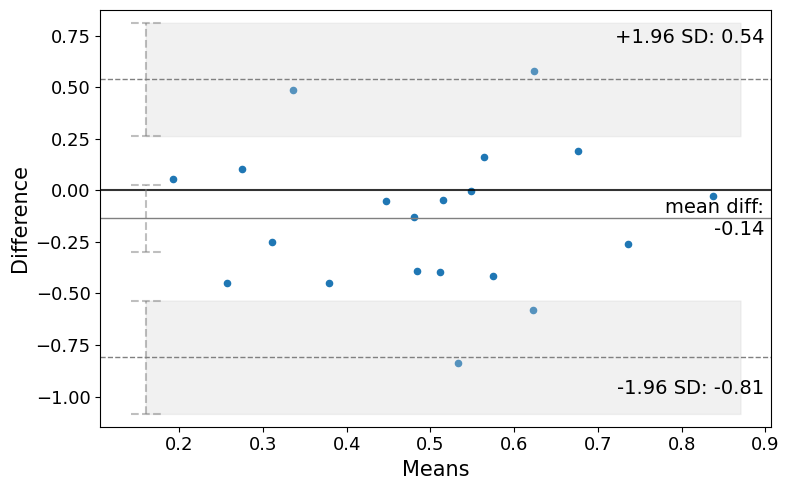

In [5]:
f, ax = plt.subplots(1, figsize = (8,5))
mean_diff_plot_ci(m1, m2, ax = ax, fig=f)
plt.show()